# 사이킷런으로 시작하는 머신러닝
## 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기


- sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트
- sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection : 학습 데이터, 검증데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

In [ ]:
from sklearn.datasets import load_iris  #붓꽃데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier   #의사결정트리 구현체
from sklearn.model_selection import train_test_split   #데이터를 학습데이터와 테스트 데이터로 분리하는 함수

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)  #훈련용 데이터 80%, 테스트 데이터 20% 로 분할

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

지도학습의 두 축인 분류(Classification)과 회귀(Regression)의 다양한 구현클래스는 fit과 predict를 일관성있게 사용하여 학습과 예측 결과를 반환합니다. 그리고 Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부릅니다. 이 Estimator 클래스가 fit과 predict를 내부에서 구현하고 있습니다.
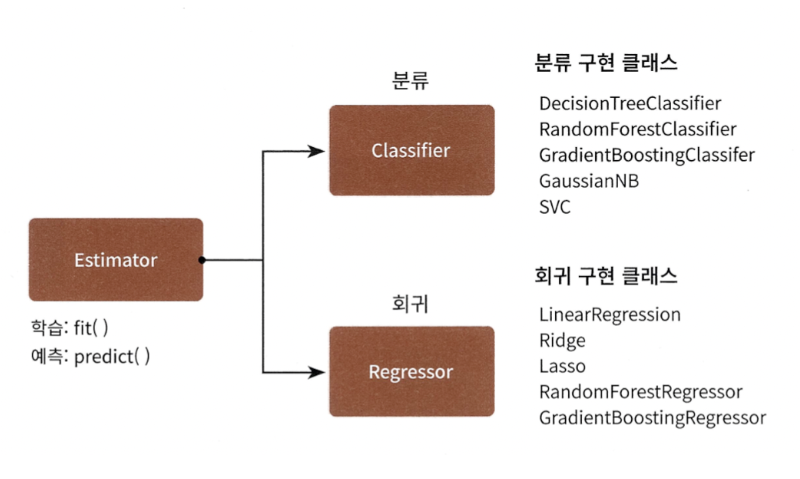

In [ ]:
from sklearn.metrics import accuracy_score           #DecisionTreeClassifier의 예측성능을 평가해보자
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))    #실제 테스트lable 과 예측값 pred를 넣고 성능평가

예측 정확도: 0.9333


앞의 붓꽃 데이터 세트로 분류를 예측한 프로세스를 정리하면 다음과 같다.
- 1.데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
- 2.모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
- 3.예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측합니다.
- 4.평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가



---



# 2.3 사이킷런 기반의 프레임워크 익히기

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0



---



# 2.4 Model Selection 소개
사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

## 학습/테스트 데이터 셋 분리 – train_test_split()
아래 예제는 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 무엇이 문제인지 살펴보는 예제

-> 예측정확도가 1.0으로 나와버림
(모의고사를 이미 한 번 보고 답을 알고있는 상태에서 모의고사 문제와 똑같은 문제를 다시 풀었기 때문)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


### 따라서 이번에는**train_test_split()** 메서드를 이용하여 train_data와 test_data를 분리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

In [ ]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) # 정확도가 95.56% 로 적절히 나왔음

예측 정확도: 0.9556


붓꽃 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 밖에 되지 않으므로 이를 통해 알고리즘의 예측 성능을 판단하기에는 적절하지가 않음.
학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요

## 교차 검증
train_data와 test_data를 별도로 나누어 고정 후에 학습하는 것은 **과적합(Overfitting)**에 취약한 약점을 가질 수 있음.
과적합이란 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것을 의미함.

이러한 문제점을 개선하기 위해 교차 검증을 이용함.
교차 검증을 간략히 설명하면 본고사를 치르기 전에 모의고사를 여러 번 보는 것.
별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행한 후 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있는 장점이 있음.


### K 폴드 교차 검증
- 가장 보편적으로 사용되는 교차 검증 기법.
K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- 사이킷런은 KFold와 StratifiedKFold 클래스를 구현체로 제공하는데 먼저 KFold로 해보자

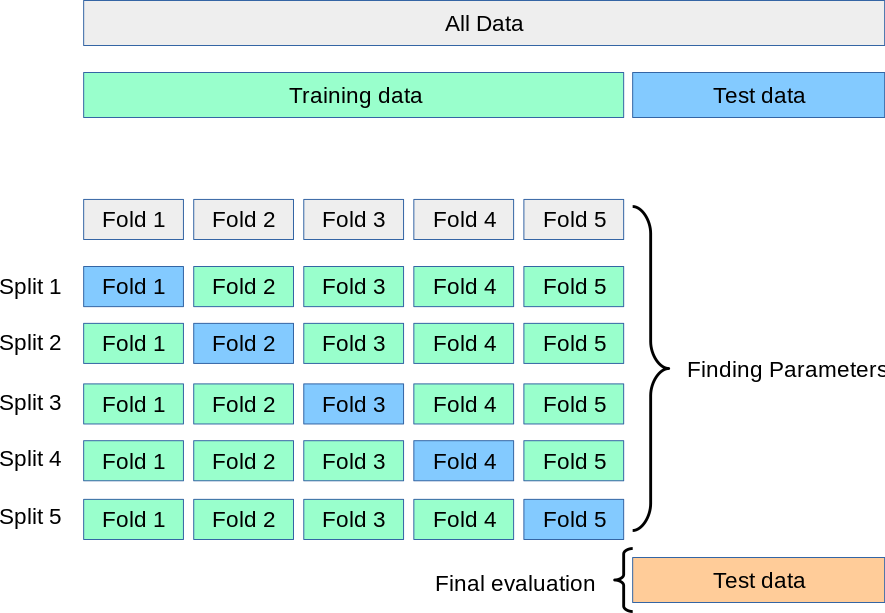

- KFold

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [ ]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- Stratified K 폴드

Stratified K 폴드는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식이다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함.

EX) 대출사기 데이터 예측 중 1억건 데이터 중에 대출 사기가 약 1000건 밖에 없을 때 (대출 사기:1, 정상 대출:0) 이면 전체의 0.0001% 의 작은 확률로 대출 사기 레이블이 존재하면 랜덤하게 데이터 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 문제가 발생.


Stratified K 폴드는 원본 데이터의 레이블 분포를 고려하여 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

- 이번에는 K폴드가 어떤 문제를 가지고 있는지 확인해 보고 이를 사이킷런의 StratifiedKFold 클래스를 이용해 개선시켜보자


In [ ]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()
#레이블 값이 0,1,2가 50개씩 즉 Setosa 품종, Versicolor 품종, Virginica 품종 모두 50개씩 있음.

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('--------------------------------------')

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64
--------------------------------------


위에서 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었음.
예를 들어 첫 번째 교차 검증에서는 학습 레이블이 1,2 값이 각각 50개가 추출되었고 검증 레이블은 0값이 50개 추출되었음. 학습레이블은 1,2 밖에 없으므로 0의 경우는 전혀 학습하지 못함. 반대로 검증 레이블은 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못함. 이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없는 문제가 발생함.

**StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결하여줌**

Let's check

**주의점** : StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요함(K폴드는 split() 메서드 인자로 피처 데이터세트만 넘김)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):   #피처 데이터 세트와 레이블 데이터 세트를 같이 넘김
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('--------------------------------------')

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64
--------------------------------------


위의 출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됐음을 볼 수 있음.

- StratifiedKFold로 데이터를 분리하고 교차검증해서 평균 검증 정확도 구하기

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산 (약 96.67% 로 단순 KFold검정을 했을 때보다 더 정확)
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


### 교차 검증을 보다 편리하게 수행할 수 있는 API - cross_val_score( )
1. 폴드 세트를 설정하고
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환
이 일련의 과정을 한꺼번에 수행하는 API

- cross_val_score( )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate  #cross_validate는 여러 개의 평가 지표 반환하는 메서드
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

#매개변수로 (estimator[회귀 or 분류], 피처 데이터 세트, 레이블 데이터 세트, 예측 성능 평가 지표, 교차 검증 폴드 수 의미)
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))
#정확도가 StratifiedKFold와 같은 이유는 cross_val_score()가 내부적으로 startifiedKFold를 이용하기 때문임.

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공합니다.
(Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트 하는 방식)

grid_parameters = {'max_depth': [1,2,3], 'min_samples_split':[2,3]}
이렇게 설정 해두면 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하여 최적의 파라미터와 수행 결과를 도출할 수 있다. -> {1,2},{1,3},{2,2},{2,3},{3,2},{3,3}

만약 CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능을 측정하고 6개의 파라미터 조합이면 3X6으로 18회의 학습/평가를 하게된다.

일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.

- GridSearchCV

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [ ]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


# 2.5 데이터 전처리
사이킷런에서 결손값은 허용되지 않는다.

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다.

그래서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.


## 데이터 인코딩
- 레이블 인코딩(Label encoding) - 레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것입니다. EX) TV:1, 냉장고:2, 전자레인지:3 등등


In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
print('인코딩 클래스:',encoder.classes_) #데이터 값이 클 때 이렇게 확인하면 어떤 값으로 인코딩 됐는지 확인하기 쉬움.

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**레이블 인코딩의 주의점**

**주의점** : EX) 냉장고가 1, 믹서가 2로 변환되면 ,1보다 2가 더 큰 값이므로 특정 ML알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생함.
이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않아야함.

트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩을 해도 괜찮음

---> 이러한 문제를 해결하기 위한 원-핫 인코딩 방식이 있다.

원-핫 인코딩(One-Hot encoding)

원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식입니다. 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시합니다.

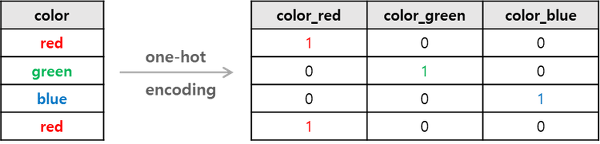

원-핫 인코딩 시에 주의점
- 입력값으로 2차원 데이터가 필요
- OneHotEncoder를 이용해 변환한 값이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 toarray() 메서드를 이용해 밀집행렬(Dense Matrix)로 변환해야 한다는 것

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다.
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다. get_dummies()를 이용하면 된다.

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 피처 스케일링과 정규화

일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (단위 스케일링)

사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있다. 사이킷런의 Normalizer 모듈을 선형대수에서의 정규화 개념이 적용됐고 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미합니다.

일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념의 정규화를 벡터 정규화로 지칭하자


- StandardScaler - 표준화를 쉽게 지원하기 위한 클래스


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.  먼저 feacture 들의 평균값과 분산값을 체크해보자
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)   #넘파이의 ndarray값으로 반환함

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환 #모든 평균이 0에 가깝고 분산은 1에 가까운 값으로 변환됐음
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- MinMaxScaler - 데이터값을 0과 1 사이의 범위 값으로 변환합니다(음수 값이 있으면 -1에서 1 값으로 변환합니다), 데이터의 분포가 정규분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있습니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항.

Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을
수행한 결과를 이용해 transform()을 변환을 적용해야 한다는 것입니다.

이러한 유의사항은 PCA와 같은 차원 축소 변환이나 텍스트의 피처 벡터화 변환 작업 시에도 동일하게 적용됨.

**머신러닝 모델을 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하기 때문이다.**

- 다음 예제는 테스트 데이터에 fit()을 적용할 때 어떠한 문제가 발생하는지 예제


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [ ]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- 잘못된 예시 (test data로 fit을 하고 이후 transform을 적용했음)

In [ ]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  데이터가 1/5 로 스케일링 되고있음 (테스트 데이터 기준에 맞춰서.. 이러면 안된다.)
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 잘한 예시 (train_data로 fit한 scaler객체를 test_data에 바로 transform을 적용시켰음)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. #test 데이터가 정상적으로 1/10 로 스케일링 되었음.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]




---



# 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

- 드라이브 마운트 및 csv 파일이 있는 디렉터리로 이동

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks
#csv파일이 있는 자기 디렉터리로 이동

/content/drive/MyDrive/Colab Notebooks


- 필요한 라이브러리 import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#첫 번째 줄에서 %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 입니다.
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info()) #보통 컬럼정보, 데이터타입, 데이터 행 개수, null값의 여부를 확인


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 머신러닝은 NaN 값을 허용하지 않으므로 Null 값을 처리

In [8]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)  #평균값으로 대체
titanic_df['Cabin'].fillna('N',inplace=True)                     # N으로 대체
titanic_df['Embarked'].fillna('N',inplace=True)                  # N으로 대체
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


- 현재 남아있는 문자열 피처들의 값 분류 살펴보기

In [9]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- 책에서 말하길 Sex, Embarked 값은 별문제가 없으나, Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않았음. C23, C25, C27과 같이 여러 Cabin이 한꺼번에 표기된 Cabin 값이 4건이됨.

따라서 맨 앞 문자만 추출해서 다시 넣겠음

In [10]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# print(titanic_df['Cabin'].head(3))
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())


 Cabin 값 분포 :
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


- 어떤 유형의 승객이 생존 확률이 높았는지 먼저 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인해보기

In [11]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 씨본 패키지로 시각화해보기

<Axes: xlabel='Sex', ylabel='Survived'>

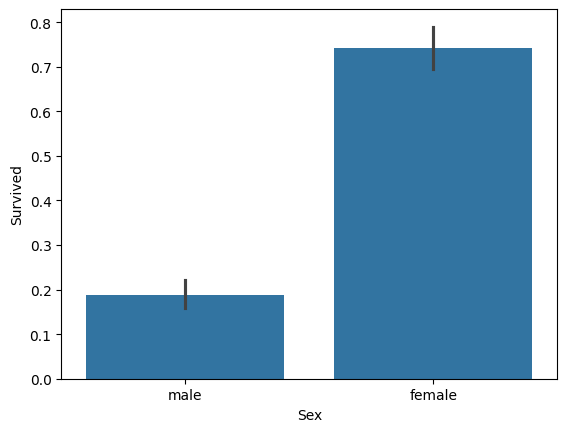

In [12]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

- 부자와 가난한 사람 간의 생존 확률을 성별을 고려해 확인해보기 ( PClass는 좌석등급임)
- 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있었음.

<Axes: xlabel='Pclass', ylabel='Survived'>

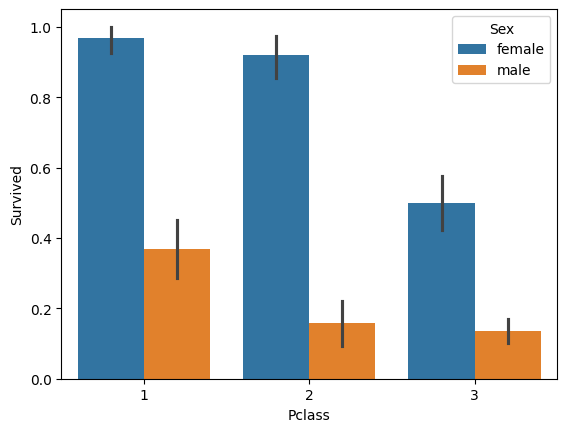

In [13]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- Age에 따른 생존 확률을 알아보기 전 Age는 값 종류가 너무 많아 범위별로 분류해 카테고리 값을 할당

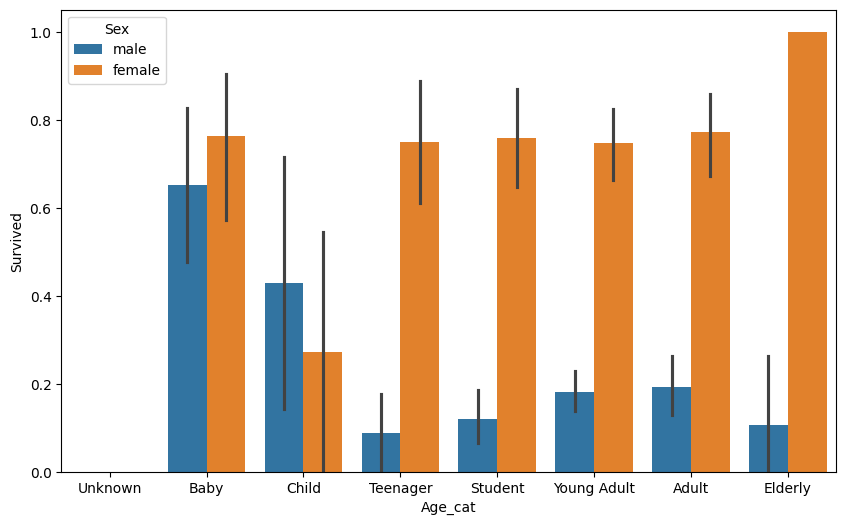

In [14]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
#컬럼 다시 지워두기
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- LableEncoder 객체는 카테고리 값의 유형 수에 따라 0~(카테고리수-1) 숫자 값으로 변환해줌

In [17]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()   #객체생성
        le = le.fit(dataDF[feature])        #fit
        dataDF[feature] = le.transform(dataDF[feature])  #transform

    return dataDF

titanic_df = encode_features(titanic_df)   #Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있음.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들기
- Null처리 함수, 불필요 피처 제거, 레이블 인코딩 수행 등등이 전처리 과정

In [18]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 데이터 전처리를 수행하는 transform_features()함수로 다시 원본 데이터 가공해보기
- Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만들기

In [19]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

- train_test_split API로 별도의 테스트 데이터 세트 추출하기 (전체의 20%를 테스트 데이터로

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀 등을 이용해 타이타닉 생존자를 예측해보기

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')   # 'liblinear'은 로지스틱 회귀의 한 종류 - 이진 분류 할 땐 liblinear가 성능이 조금 더 좋은경향

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


교차 검증으로 결정 트리 모델을 좀 더 평가해보기
- KFold 클래스 이용

In [23]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행.
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- cross_val_score() API를 이용해 내부적으로 StratifiedKFold 이용해서 해보기

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


- GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능을 측정

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)  #param_grid로 parameters 넣기
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
#best estimator를 결정트리 구현체로 결정
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
